In [1]:
%run "../../../common/0_notebooks_base_setup.py"   

C:\Users\anabella\Documents\DH\Actividades\clase_04\dsad_2021\common
default checking
Running command `conda list`... ok
jupyterlab=2.2.6 already installed
pandas=1.1.5 already installed
bokeh=2.2.3 already installed
seaborn=0.11.0 already installed
matplotlib=3.3.2 already installed
ipywidgets=7.5.1 already installed
pytest=6.2.1 already installed
chardet=4.0.0 already installed
psutil=5.7.2 already installed
scipy=1.5.2 already installed
statsmodels=0.12.1 already installed
scikit-learn=0.23.2 already installed
xlrd=2.0.1 already installed
Running command `conda install --yes nltk=3.5.0`... ok
Solving environment: ...working... done

# All requested packages already installed.


unidecode=1.1.1 already installed
pydotplus=2.0.2 already installed
pandas-datareader=0.9.0 already installed
flask=1.1.2 already installed


---

<img src='../../../common/logo_DH.png' align='left' width=35%/>


En la práctica de la clase de hoy usaremos un dataset de Kaggle que tiene datos de ventas:

https://www.kaggle.com/kyanyoga/sample-sales-data

Ustedes tienen un subconjunto de los datos disponibles para resolver los ejercicios de esta práctica.

## Ejercicio 1
Leer los datos del archivo /M1/CLASE_03/Data/sales_data_sample_excercise.csv

Este archivo tiene algunos datos numéricos y otros de tipo cadena de caracteres. 

Las columnas son:

* ORDERNUMBER: int, id de la orden

* SALES: float, monto abonado

* MONTH_ID: int, mes

* YEAR_ID: int, año

* PRODUCTLINE: str, producto

* COUNTRY: str, país de venta

¿Recuerdan que todos los elementos de una instancia de ndarray deben ser del mismo tipo? Entonces vamos a leer el archivo y crear una instancia de ndarray de tipo cadena de caracteres.

¿Qué pasaría si intentáramos crear una instancia de tipo int? ¿Y de tipo float?


In [3]:
import numpy as np

In [6]:
data_location = "../Data/sales_data_sample_exercise.csv"
data = np.genfromtxt(data_location, skip_header=1, delimiter="\t", dtype=str)
data

array([['10107', '2871', '2', '2003', 'Motorcycles', 'USA'],
       ['10121', '2765.9', '5', '2003', 'Motorcycles', 'France'],
       ['10134', '3884.34', '7', '2003', 'Motorcycles', 'France'],
       ...,
       ['10386', '5417.57', '3', '2005', 'Ships', 'Spain'],
       ['10397', '2116.16', '3', '2005', 'Ships', 'France'],
       ['10414', '3079.44', '5', '2005', 'Ships', 'USA']], dtype='<U16')

## Ejercicio 2

La función `distribution_plotter` grafica los datos que recibe como parámetro en una instancia de numpy array

Graficar los precios de ventas en tres países. ¿Qué pueden decir respecto a sus distribuciones?

Comparar las distribuciones con la de los precios de ventas sin distinguir por paises

In [2]:
import seaborn as sns

def distribution_plotter(data, label, bin_width=500):    
    sns.set(rc={"figure.figsize": (7, 5)})
    sns.set_style("white")    
    dist = sns.histplot(data, stat = 'count', kde = False, 
                        line_kws = {'linewidth':5}, 
                        binwidth = bin_width)    
    dist.set_title('Distribucion ' + label + '\n', fontsize = 16)

In [34]:
countries_registers = data[:, 5]
sales_registers = data[:, 1].astype(float) # Debemos recordar adecuar el tipo de dato.

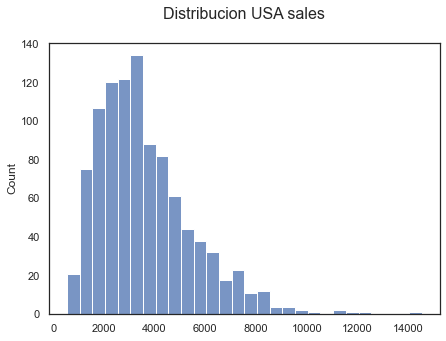

In [35]:
usa_sales = sales_registers[countries_registers == "USA"]
distribution_plotter(usa_sales, "USA sales")

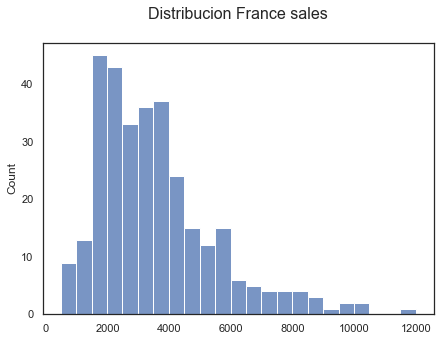

In [36]:
# France
france_sales = sales_registers[countries_registers == "France"]
distribution_plotter(france_sales, "France sales")

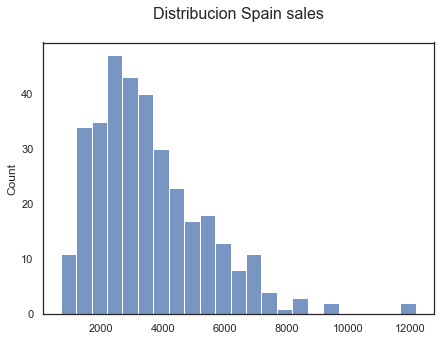

In [37]:
# Spain
spain_sales = sales_registers[countries_registers == "Spain"]
distribution_plotter(spain_sales, "Spain sales")

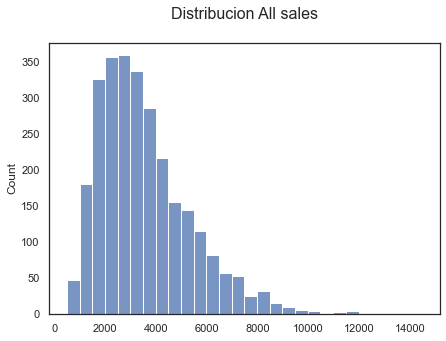

In [38]:
# All countries
distribution_plotter(sales_registers, "All sales")

In [ ]:
# Todas las distribuciones tienden a tener asimetría a derecha. Podemos verificar en el siguiente ejercicio que en cada caso,
# la mediana es siempre menor que la media (lo que es una característica de esta asimetría).

## Ejercicio 3
Para los tres países del punto anterior, calcular con dos decimales
* Media
* Mediana
* Rango
* Desvío estandard

Repetir para todos los datos de ventas sin distinguir por país.

¿Qué conclusiones pueden sacar respecto a la información que brinda cada una de estas medidas en este caso particular?

In [45]:
# USA
usa_mean = np.mean(usa_sales)
usa_median = np.median(usa_sales)
usa_range = np.max(usa_sales) - np.min(usa_sales)
usa_std = np.std(usa_sales)
print("-Mean-", "-Median-", "-Range-", "-STD-")
print(round(usa_mean, 2), round(usa_median, 2), round(usa_range, 2), round(usa_std, 2))

-Mean- -Median- -Range- -STD-
3613.53 3236.06 13541.66 1880.0


In [46]:
# France
france_mean = np.mean(france_sales)
france_median = np.median(france_sales)
france_range = np.max(france_sales) - np.min(france_sales)
france_std = np.std(france_sales)
print("-Mean-", "-Median-", "-Range-", "-STD-")
print(round(france_mean, 2), round(france_median, 2), round(france_range, 2), round(france_std, 2))

-Mean- -Median- -Range- -STD-
3537.95 3154.3 11257.57 1939.21


In [47]:
# Spain
spain_mean = np.mean(spain_sales)
spain_median = np.median(spain_sales)
spain_range = np.max(spain_sales) - np.min(spain_sales)
spain_std = np.std(spain_sales)
print("-Mean-", "-Median-", "-Range-", "-STD-")
print(round(spain_mean, 2), round(spain_median, 2), round(spain_range, 2), round(spain_std, 2))

-Mean- -Median- -Range- -STD-
3554.64 3213.8 11317.2 1833.14


In [48]:
# All countries
all_countries_mean = np.mean(sales_registers)
all_countries_median = np.median(sales_registers)
all_countries_range = np.max(sales_registers) - np.min(sales_registers)
all_countries_std = np.std(sales_registers)
print("-Mean-", "-Median-", "-Range-", "-STD-")
print(round(all_countries_mean, 2), round(all_countries_median, 2), round(all_countries_range, 2), round(all_countries_std, 2))

-Mean- -Median- -Range- -STD-
3553.89 3184.8 13600.67 1841.54


In [ ]:
# De los 3 países, USA es el que tiene mayor rango de precio de ventas y Francia es el que tiene el mayor desvío estándar.

# En la distribución de todos los países, se ve una clara tendencia de que priman las ventas más económicas y en mucha menor medida, 
# las ventas más costosas.